In [1]:
# Some IPython magic to get the notebook running

from IPython.core.magic import register_cell_magic
import traceback


@register_cell_magic
def ignore_exceptions(line, cell):
    try:
        return exec(cell)
    except Exception as e:
        traceback.print_exc()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Models of neural systems

# NumPy: creating and manipulating numerical data

*Rike-Benjamin Schuppner, Institute for Theoretical Biology*

rike.schuppner@bccn-berlin.de

## Why numpy?

**Python has built-in:**

* *containers*: lists (costless insertion and append), dictionaries (fast lookup)
* *high-level number objects*: integers, floating point, complex numbers (`2+3j`)

**Numpy is:**

* extension package to Python for *multi-dimensional arrays*
* closer to hardware (*efficiency*)
* designed for scientific computation (*convenience*)

## Example: Random walk

Simulate a random walk of 10000 steps (`-1, 1`).

(`random.randint`)

### Version #1: Simple Python iteration

In [3]:
import random

def walk1(nsteps):
    walk = []
    position = 0
    for x in range(nsteps):
        position += 2 * random.randint(0, 1) - 1
        walk.append(position)
    return walk

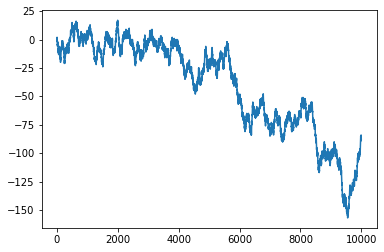

In [4]:
plt.plot(walk1(10000));

In [5]:
%timeit walk1(10000)

10.1 ms ± 711 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Version #2: Itertools tricks

The built-in itertools package provides us with an `accumulate` function. Maybe it will be faster if we donâ€™t have to write the addition ourselves.

In [6]:
import random
import itertools

def walk2(nsteps):
    steps = random.choices([-1, 1], k=nsteps)
    return list(itertools.accumulate(steps))

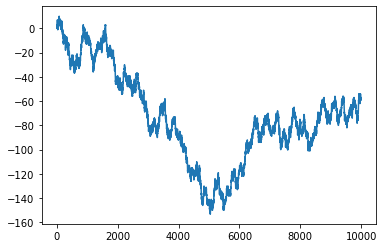

In [7]:
plt.plot(walk2(10000));

In [8]:
%timeit walk2(10000)

1.39 ms ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Version #3: Using numpy

This code is conceptually equivalent to the itertools solution. But now `steps` is a numpy array and not a Python list.

In [9]:
import numpy as np # convention

def walk3(nsteps):
    steps = np.random.choice([-1, 1], size=nsteps)
    return np.cumsum(steps)

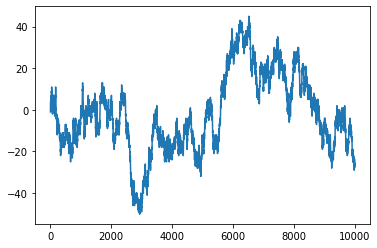

In [10]:
plt.plot(walk3(10000));

In [11]:
%timeit walk3(10000)

102 µs ± 6.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Version #3b: We can even +1 the numpy solution (or +5, +10, â€¦)

In [12]:
def walk4(nsteps, nwalks=1):
    steps = np.random.choice([-1, 1], size=(nsteps, nwalks))
    return np.cumsum(steps, axis=0)

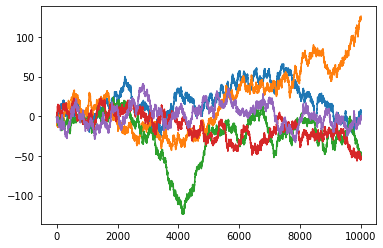

In [13]:
plt.plot(walk4(10000, nwalks=5));

In [14]:
%timeit walk4(10000, nwalks=5)

395 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Will it always be that much faster?

Depends

You cannot always rely on numpy functions only. Speed-up depends on the relation between numpy-code and â€˜normal Pythonâ€™.

Trick is to know what can be done (obviously) with numpy.


In [15]:
%timeit walk1(10000)
%timeit walk2(10000)
%timeit walk3(10000)

9.69 ms ± 369 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## The numpy array object

Letâ€™s dive into numpy.

In [ ]:
a = np.array([0, 1, 2, 3, 4])
a

**For example...**

*...an array containing:*

* values of an experiment/simulation at discrete time steps
* signal recorded by a measurement device, e.g. sound wave
* pixels of an image, grey-level or colour
* 3-D data measured at different X-Y-Z positions, e.g. MRI scan
* ...

**Why is it useful?** 

*efficient numerical operations*

In [ ]:
l = range(1000)
%timeit [i**2 for i in l]

In [ ]:
a = np.arange(1000)
%timeit np.power(a, 2)  # a**2  # 

**Reference documentation:**

* On the web: http://docs.scipy.org/
* Interactive help: `help(np.array)`, `np.array?`, `np.lookfor('create array')`

### Creating and using numpy arrays

* one dimension

In [ ]:
a = np.array([0, 1, 2, 3])
a

In [ ]:
a.ndim

In [ ]:
a.shape

In [ ]:
len(a)

* two dimensions

In [ ]:
b = np.array([[0, 1, 2], [3, 4, 5]])
b

In [ ]:
b.ndim

In [ ]:
len(b) # returns the size of the first dimension

In [ ]:
b.shape

* three dimensions

In [ ]:
c = np.array([[[1, 2], [3, 4], [5, 6]], [[7, 8], [9, 10], [11, 12]]])
c

In [ ]:
list(c.shape)

In practice, we rarely enter items one by one...

* Evenly spaced:

In [ ]:
a = np.arange(10) # 0 .. n-1 (!)
a

In [ ]:
b = np.arange(1, 9, 2) # start, end (exlusive), step
print(b)

* or by number of points:

In [ ]:
c = np.linspace(0, 1, 6) # start, end, num-points
c

In [ ]:
d = np.linspace(0, 1, 5, endpoint=False)
d

* Common arrays: 

In [ ]:
a = np.ones((3, 3)) # reminder: (3, 3) is a tuple
a

In [ ]:
b = np.zeros((2, 2))
b

In [ ]:
c = np.eye(3)
c

In [ ]:
d = np.diag(np.array([1, 2, 3, 4]))
d

* np.random: random numbers (Mersenne Twister PRNG):

In [ ]:
a = np.random.rand(4) # uniform in [0, 1]
a

In [ ]:
b = np.random.randn(4) # Gaussian
b

In [ ]:
np.random.seed(100) # Setting the random seed

### Exercise

* Generate a diagonal matrix (15 x 15) with random entries integers between 0 and 10 (not inclusive).

* If you are done: Print the 2nd and 3rd row ONLY.

### Answer

In [ ]:
res = np.diag(np.random.randint(low=0, high=10, size=15))
print(res)

In [ ]:
res[2:4]

### Basic data types

You may have noticed that, in some instances, array elements are displayed with a trailing dot (e.g. 2. vs 2). 

This is due to a difference in the data-type used:

In [ ]:
a = np.array([1, 2, 3])
a.dtype

In [ ]:
b = np.array([1., 2., 3.])
b.dtype

Different data-types allow us to store data more compactly in memory, but most of the time we simply work with
floating point numbers. 

Note that, in the example above, NumPy auto-detects the data-type from the input.

* You can explicitly specify which data-type you want:

In [ ]:
c = np.array([1, 2, 3], dtype=int)
c.dtype

* The default data type is floating point:

In [ ]:
a = np.ones((3, 3), dtype=int)
a.dtype
a

There are also other types:

* Complex

In [ ]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

* Bool

In [ ]:
e = np.array([True, False, False, True])
e.dtype

* Strings

In [ ]:
f = np.array(['a','happy','world'])
f.dtype # <--- strings containing max. 5 letters

In [ ]:
f[:] = 'abcdefg'
f

* Many more, ... int32/int64 ...

### Indexing and slicing

The items of an array can be accessed and assigned to the same way as other Python sequences (e.g. lists)

In [ ]:
a = np.arange(10)
a

In [ ]:
a[0], a[2], a[-1]

**Warning: Indices begin at 0, like other Python sequences (and C/C++).**

In contrast, in Fortran, Matlab, R or Julia, indices begin at 1.

* For multidimensional arrays, indices are tuples of integers:

In [ ]:
a = np.diag(np.arange(3))
a

In [ ]:
a[(1, 1)]

In [ ]:
a[2, 1] = 10 # third line, second column
a

In [ ]:
a[1]

**Note that:**

* In 2D, the first dimension corresponds to rows, the second to columns.
* for multidimensional a, a[0] is interpreted by taking all elements in the unspecified dimensions.

**Slicing** 

* Arrays, like other Python sequences can also be sliced:

In [ ]:
a = np.arange(10)
a

In [ ]:
a[2:9:3] # [start:end:step]

**Note that:** 
    
* end index is not included!

In [ ]:
a[:4]

* All three slice components are optional 
* by default, start is 0, end is the last and step is 1:

In [ ]:
a[1:3]

In [ ]:
a[::2]

In [ ]:
a[3:]

Overview:
![](numpy_indexing.png)

### Copies and views

* A slicing operation creates a **view** on the original array. 

* This is just a way of *accessing* array data. Thus the
original array is **not copied in memory**.

* When modifying the view, the original array is modified as well:

In [ ]:
a = np.arange(10)
a

In [ ]:
b = a[::2]
b

In [ ]:
b[0] = 12
b

In [ ]:
a # (!)

In [ ]:
a = np.arange(10)
b = a[::2].copy() # force a copy
b[0] = 12
a

* This behavior can be surprising at first sight... 

* but it allows to save both memory and time.

**Warning:** The transpose is a view

As a result, a matrix cannot be made symmetric in-place:

In [ ]:
dim = 100
a = np.random.rand(dim, dim)
a += a.T      # May fail for big dimensions
a

In [ ]:
a = np.random.rand(dim, dim)
a += a.copy().T
a